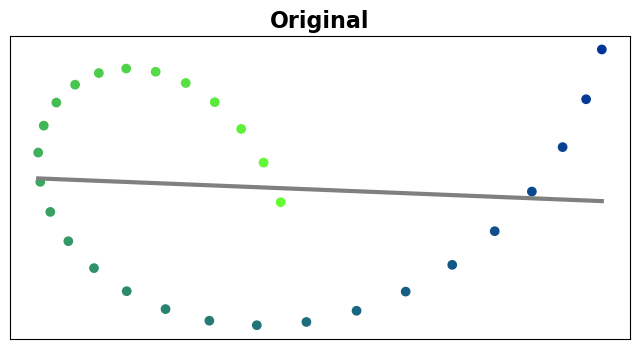

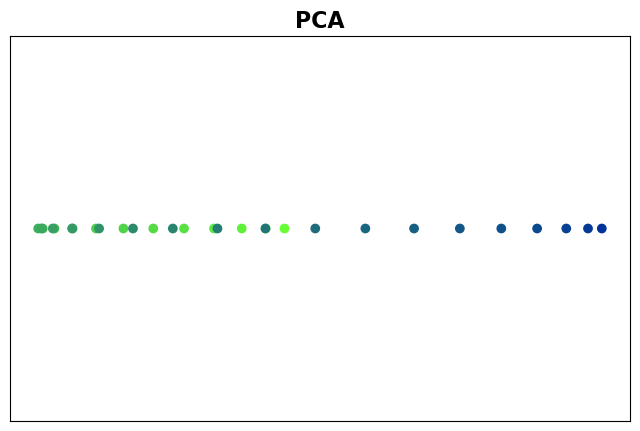

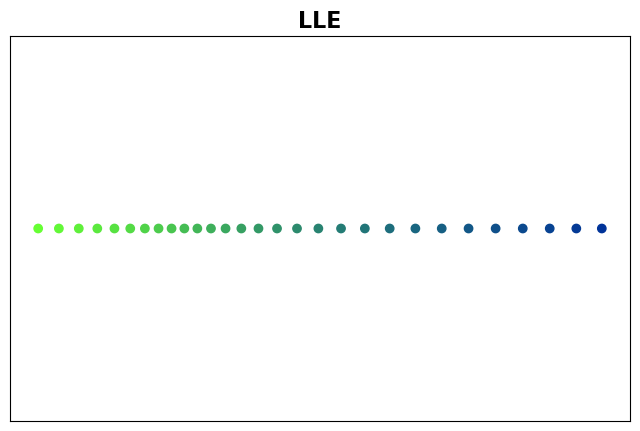

In [1]:
#works on pandas 1.5.3, numpy 1.24.3, matplotlib 3.6.2 and sci-kit learn 1.2.2 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.decomposition import PCA

t = np.arange(-2.5,np.pi, 0.2)
c = 4
y = t-c*np.sin(t)
x = t-c*np.cos(t)
X = pd.DataFrame(data = {"x":x,"y":y})

colors = np.zeros((X.shape[0], 3))
colors[:, 2] = np.linspace(0.2,0.6,29)
colors[:, 1] = np.linspace(1,0.2,29)
colors[:, 0] = np.linspace(0.4,0,29)

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x,y, c=colors)
ax.set_title("Original", fontsize = 16)

#PCA transformation
pca = PCA(n_components=1)
X_PCA = pca.fit_transform(X)

pca_direction = pca.components_[0]
x0, y0 = pca.mean_
x_lowest = np.min(x)
x_highest = np.max(x)
y_lowest = y0 - (pca_direction[1] / pca_direction[0]) * (x0 - x_lowest)
y_highest = y0 - (pca_direction[1] / pca_direction[0]) * (x0 - x_highest)

ax.plot([x_lowest, x_highest], [y_lowest, y_highest], c='grey', linewidth=3)

ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
plt.show()

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(X_PCA, np.zeros_like(X_PCA), c=colors)
ax.set_title("PCA", fontsize = 16)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

#LLE transformation
fig, ax = plt.subplots(figsize=(8,5))
LLE = manifold.LocallyLinearEmbedding(
        n_neighbors=2,
        n_components=1
    )
X_LLE = LLE.fit_transform(X)

ax.scatter(X_LLE, np.zeros_like(X_LLE), c=colors)
ax.set_title("LLE", fontsize = 16)

ax.set_xticks([])
ax.set_yticks([])
plt.show()